# Importing dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

### important
Dont forget to install necessary libraries

```
pip install tensorflow keras numpy matplotlib ipython
```

### usage of libraries
**tensorflow** - various machine learning tasks, especially deep learning<br>
**keras** - part of tensorflow, Python interface for artificial neural networks<br>
**numpy** - fast scientific/numerical calculations<br>
**matplotlib** - visual representations of data<br>
**IPython** - utilities to display various media representations in Jupyter notebooks<br>

# Loading data into tensorflow dataset object

In [39]:
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    shuffle = True,
    seed = 24
)

Found 16011 files belonging to 10 classes.


# What is tensorflow Dataset?

**tf Dataset** is a powerful framework designed to handle large datasets efficiently by loading data in batches and providing a lot of functions for preprocessing and data transformation, like filtering, mapping etc. 

In [4]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

501

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 2 7 7 6 6 0 0 1 7 3 5 0 2 1 5 4 4 7 2 7 0 7 2 5 9 7 9 5 5 8 7]


**32** - batch size - number of images in one batch<br>
**(256, 256)** - the height and width of each image<br>
**3** - the number of channels in each image (RGB channels)<br>

In [7]:
"""
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
"""

'\nfor image_batch, label_batch in dataset.take(1):\n    print(image_batch.shape)\n    print(label_batch.numpy())\n'

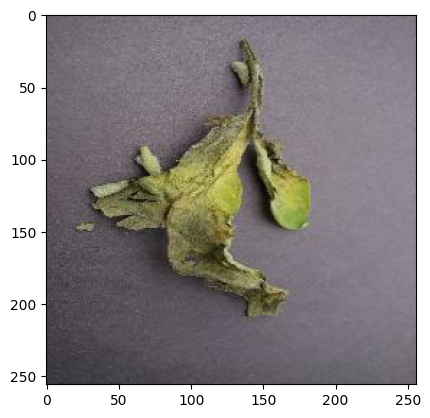

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.show

In [9]:
EPOCHS = 50

# Train test split

This allow you to train your model on some part of dataset, then validate and test on new/unseen data from your dataset

In [10]:
len(dataset)

501

**80%** ==> training set<br>
**20%** ==> **10%** validation set, **10%** test set

**example**<br>
training_dataset = dataset.take(10)<br>
dataset = dataset.skip(10)

In [11]:
def get_partitioned_datasets(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
        if shuffle:
            dataset = dataset.shuffle(shuffle_size, seed=10)

        dataset_len = len(dataset)
    
        train_len = int(train_split*dataset_len)
        train_dataset = dataset.take(train_len)
        dataset = dataset.skip(train_len)

        val_len = int(val_split*dataset_len)
        val_dataset = dataset.take(val_len)
        dataset = dataset.skip(val_len)

        test_len = dataset_len - train_len - val_len
        test_dataset = dataset.take(test_len)

        return train_dataset, val_dataset, test_dataset

In [12]:
train_dataset, val_dataset, test_dataset = get_partitioned_datasets(dataset)

In [13]:
len(train_dataset)

400

In [14]:
len(val_dataset)

50

In [15]:
len(test_dataset)

51

In [16]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data augmentation

In [53]:
ONE_IMAGE_SIZE = 256

In [54]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(ONE_IMAGE_SIZE, ONE_IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [55]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

### HOW WE RECOGNIZE IMAGES AS HUMANS?
small features of the image one by one, like eyes, tail, ears and so on<br>
**pri NN pouzijeme na toto FILTRE, napriklad 1 a -1 na rozpoznanie hran (=celych feature)**
### WHY WE NEED DENSE NEURAL NETWORK IN THE END?
because we will get different results from feature extraction and we need to classify if it is correct or no
### WHAT IS RELU ACTIVATION FUNCTION?
It makes all negative numbers 0 and all positive number stay
### WHY WE USE RELU ACTIVATION FUNCTION?
ReLU helps with making the model nonlinear

In [56]:
CHANNELS = 3
input_shape = (BATCH_SIZE, ONE_IMAGE_SIZE, ONE_IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [57]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_25 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_114 (Conv2D)                  │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_114 (MaxPooling2D)     │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_115 (Conv2D)                  │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_115 (MaxPooling2D)     │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_116 (Conv2D)                  │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_116 (MaxPooling2D)     │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_117 (Conv2D)                  │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_117 (MaxPooling2D)     │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_118 (Conv2D)                  │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_118 (MaxPooling2D)     │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_119 (Conv2D)                  │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_119 (MaxPooling2D)     │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)